# **Customer Segmentation**


---


In this project, we will analyze a dataset containing data on various customers' annual spending amounts (reported in monetary units) of diverse product categories. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wholesale+customers). For the purposes of this project, the features 'Channel' and 'Region' will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

**Explore customer product purchase dataset**


---

In this section, we will begin exploring the data through visualizations and code to understand how each feature is related to the others. we will observe a statistical description of the dataset, consider the relevance of each feature.


**Description of Categories**

Fresh : annual spending (m.u.) on fresh products(Continuous)

Milk : annual spending (m.u.) on milk products(Continuous)

Grocery : annual spending (m.u.) on grocery products(Continuous)

Frozen : annual spending (m.u.) on frozen products (Continuous) 

Detergents_Paper : annual spending (m.u.) on detergents and paper products (Continuous) 

Delicatessen : annual spending (m.u.) on and delicatessen products (Continuous)

In [1]:
import pandas as pd
import numpy as np

wholesale = pd.read_csv("Wholesale customers data.csv")
wholesale = wholesale.drop(["Channel","Region"], axis=1)
print("Wholesale customers dataset has {} samples with {} features each.".format(wholesale.shape[0], wholesale.shape[1]))
wholesale.head()

Wholesale customers dataset has 440 samples with 6 features each.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [2]:
stats = wholesale.describe()
stats

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


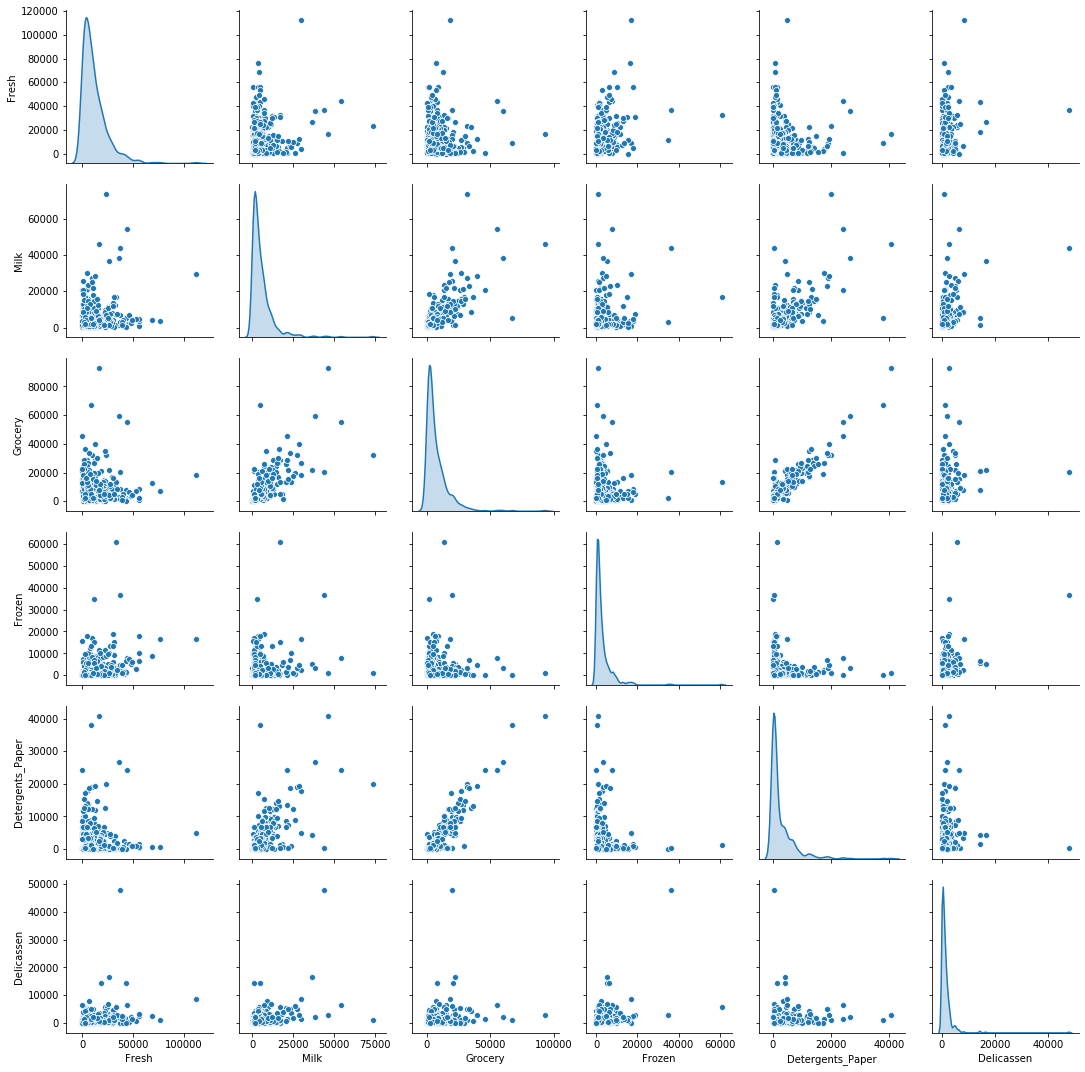

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(wholesale, diag_kind='kde')
plt.show()

Most variables have non-symmetrical distributions i.e. they are skewed.

**Data preparation for segmentation**


---


In this section, we will preprocess the data to create a better representation of customers by performing a scaling on the data.

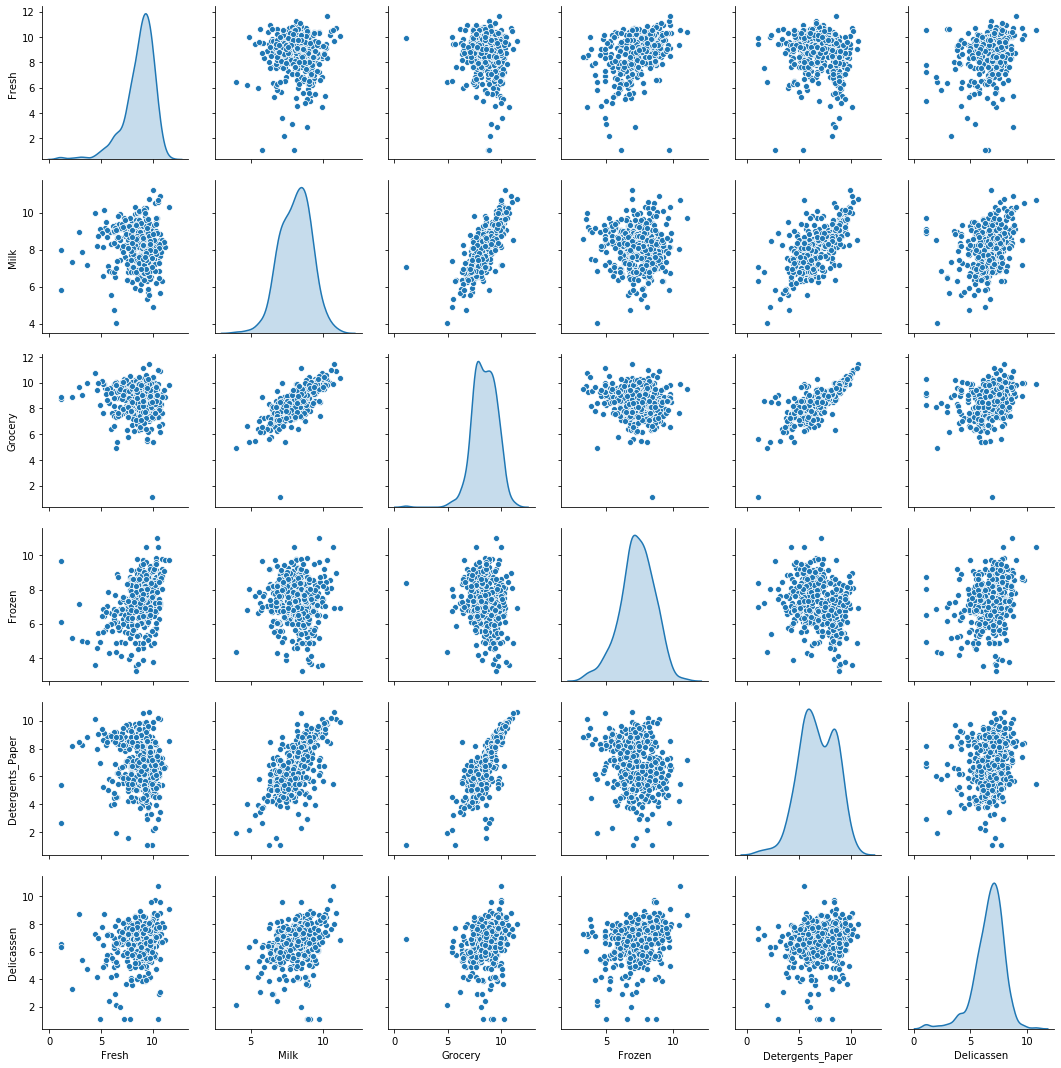

In [4]:
# Unskew the variables
wholesale_log = np.log(wholesale)
sns.pairplot(wholesale_log, diag_kind='kde')
plt.show()

The variables  now are almost normally distributed.

In [5]:
# Transform the unskewed dataset "wholesale_log" to the same scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(wholesale_log)
wholesale_scaled = scaler.transform(wholesale_log)
wholesale_scaled_df = pd.DataFrame(data=wholesale_scaled, 
                                   index=wholesale_log.index,
                                   columns=wholesale_log.columns)
wholesale_scaled_df.agg(['mean','std']).round()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
mean,-0.0,-0.0,-0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0


**Build customer and product segmentation**


---


In this section, we will choose to use a K-Means clustering algorithm to identify the various customer segments hidden in the data. 

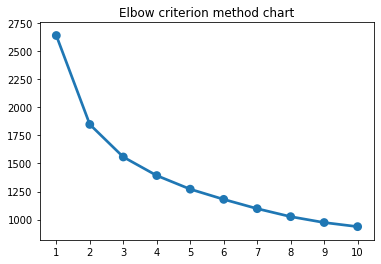

In [6]:
# Determine the optimal number of clusters
from sklearn.cluster import KMeans 

sse = {}

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=333)
    kmeans.fit(wholesale_scaled_df)
    sse[k] = kmeans.inertia_

plt.title('Elbow criterion method chart')

sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

The "elbow" is somewhere around 2 or 3 clusters

In [7]:
# Initialize `KMeans` with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=123)

kmeans.fit(wholesale_scaled_df)

# Assign the generated labels to a new column
wholesale_kmeans3 = wholesale.assign(segment = kmeans.labels_)
wholesale_kmeans3

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,segment
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,1
2,6353,8808,7684,2405,3516,7844,1
3,13265,1196,4221,6404,507,1788,2
4,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1
436,39228,1431,764,4510,93,2346,2
437,14531,15488,30243,437,14841,1867,1
438,10290,1981,2232,1038,168,2125,2


In [8]:
# we will explore the average column values for a 3-segment solution with K-means

# Group by the segment label and calculate average column values
kmeans3_averages = wholesale_kmeans3.groupby(['segment']).mean().round(0)
kmeans3_averages

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
segment,,,,,,
0,2869.0,7099.0,12459.0,607.0,5487.0,781.0
1,17050.0,10519.0,13267.0,4134.0,4960.0,2832.0
2,11964.0,1983.0,2492.0,3273.0,424.0,893.0


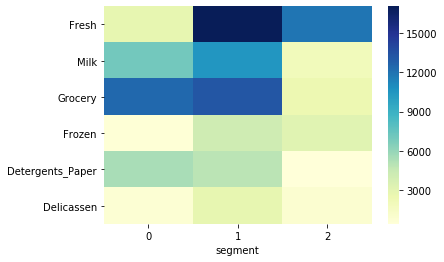

In [9]:
# Create a heatmap on the average column values per each segment
sns.heatmap(kmeans3_averages.T, cmap='YlGnBu')
plt.show()